In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #visualizing data
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Amazon Sales data.csv') #upload csv file
df.shape

(100, 14)

# **Data Cleaning**

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
#check for null values
pd.isnull(df).sum()


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [11]:
#change data type
df['Unit Price'] = df['Unit Price'].astype('int')
df['Unit Cost'] = df['Unit Cost'].astype('int')
df['Total Revenue'] = df['Total Revenue'].astype('int')
df['Total Cost'] = df['Total Cost'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    int64  
 10  Unit Cost       100 non-null    int64  
 11  Total Revenue   100 non-null    int64  
 12  Total Cost      100 non-null    int64  
 13  Total Profit    100 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 11.1+ KB


In [13]:
#change Total profit to percentage
df['Total Profit'] = df['Total Profit'] * 100

In [16]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [17]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [18]:
#rename column
df.rename(columns = {'Sales Channel':'Mode'})

,Region,Country,Item Type,Mode,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255,159,2533654,1582243,95141050.0
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205,117,576782,328376,24840636.0
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651,524,1158502,933903,22459875.0
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9,6,75591,56065,1952582.0
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651,524,3296425,2657347,63907750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109,35,97040,31825,6521472.0
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9,6,58471,43367,1510347.0
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154,90,228779,135031,9374805.0
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81,56,471336,326815,14452102.0


In [19]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.400000,190.390000,1.373487e+06,9.318052e+05,4.416820e+07
std,2.606153e+08,2794.484562,235.670417,188.220046,1.460029e+06,1.083938e+06,4.385379e+07
min,1.146066e+08,124.000000,9.000000,6.000000,4.870000e+03,3.612000e+03,1.258020e+05
25%,3.389225e+08,2836.250000,81.000000,35.000000,2.687208e+05,1.688678e+05,1.214436e+07
50%,5.577086e+08,5382.500000,179.500000,107.000000,7.523140e+05,3.635660e+05,2.907680e+07
75%,7.907551e+08,7369.000000,437.000000,263.000000,2.212044e+06,1.613869e+06,6.358288e+07
max,9.940222e+08,9925.000000,668.000000,524.000000,5.997054e+06,4.509793e+06,1.719922e+08


# **Exploratory Data Analysis**


In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [22]:
# Set 'Order Date' as the index for time-based analysis
df.set_index('Order Date', inplace=True)

In [23]:
# Resample the data at different frequencies (daily, weekly, monthly, yearly) and calculate total sales
daily_sales = df['Total Revenue'].resample('D').sum()
weekly_sales = df['Total Revenue'].resample('W').sum()
monthly_sales = df['Total Revenue'].resample('M').sum()
yearly_sales = df['Total Revenue'].resample('Y').sum()

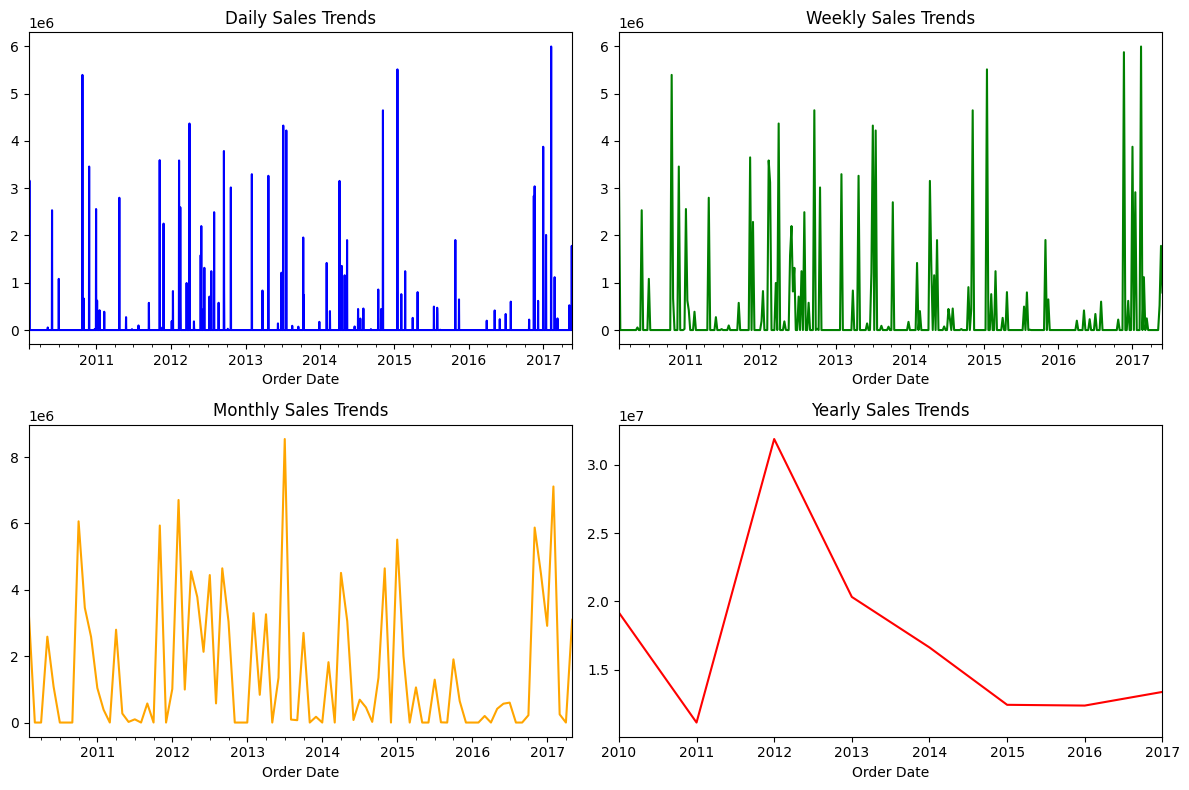

In [25]:
# Plotting the trends
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
daily_sales.plot(title='Daily Sales Trends', color='blue')

plt.subplot(2, 2, 2)
weekly_sales.plot(title='Weekly Sales Trends', color='green')

plt.subplot(2, 2, 3)
monthly_sales.plot(title='Monthly Sales Trends', color='orange')

plt.subplot(2, 2, 4)
yearly_sales.plot(title='Yearly Sales Trends', color='red')

plt.tight_layout()
plt.show()

In [27]:
#Which Item type have the highest sales volume or revenue?
#Group the data by Item Type and calculate total revenue for each item type
item_sales = df.groupby('Item Type')['Total Revenue'].sum()

# Find the item type with the highest total revenue
highest_revenue_item = item_sales.idxmax()  # idxmax() returns the index of the maximum value

print("Item type with the highest sales revenue:", highest_revenue_item)

Item type with the highest sales revenue: Cosmetics


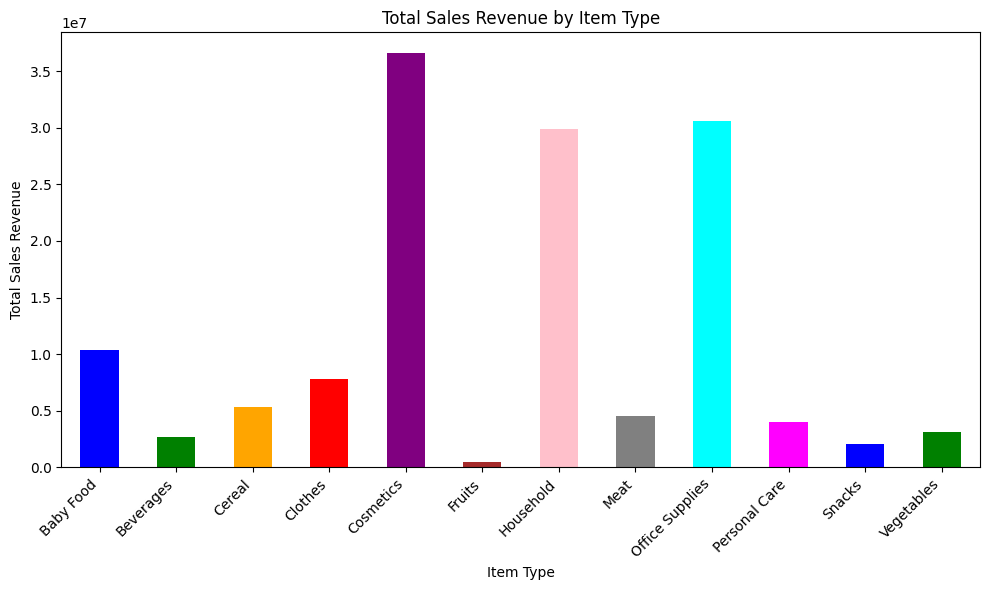

In [30]:
custom_colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plotting the bar chart for Total Sales Revenue By Item Type
plt.figure(figsize=(10, 6))
item_sales.plot(kind='bar', color=custom_colors)
plt.title('Total Sales Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

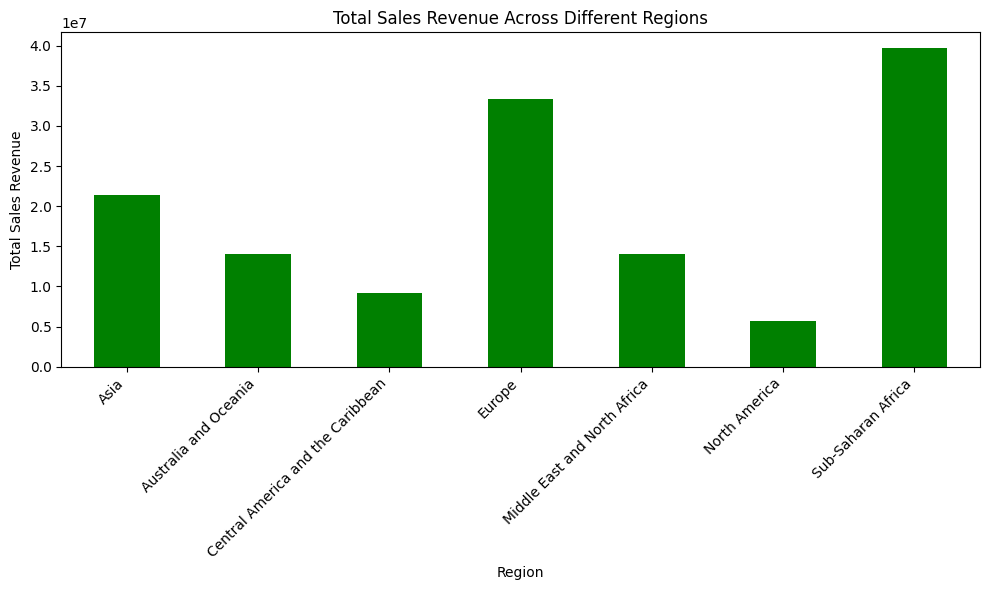

In [32]:
#How do sales vary across different regions ?
# Aggregate sales data based on regions
region_sales = df.groupby('Region')['Total Revenue'].sum()

# Plotting the bar chart for sales across different regions
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='green')
plt.title('Total Sales Revenue Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show

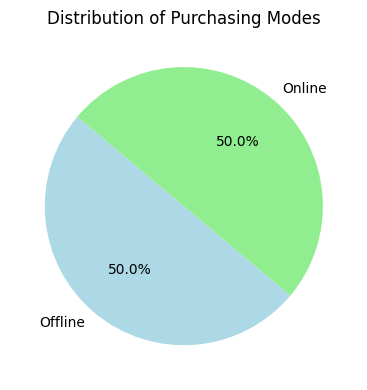

In [39]:
#What are the purchasing Mode?
# Count the occurrences of each sales channel or order mode
purchase_modes = df['Sales Channel'].value_counts()

# Plotting the pie chart for distribution of purchasing modes
plt.figure(figsize=(6, 4))
purchase_modes.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribution of Purchasing Modes')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

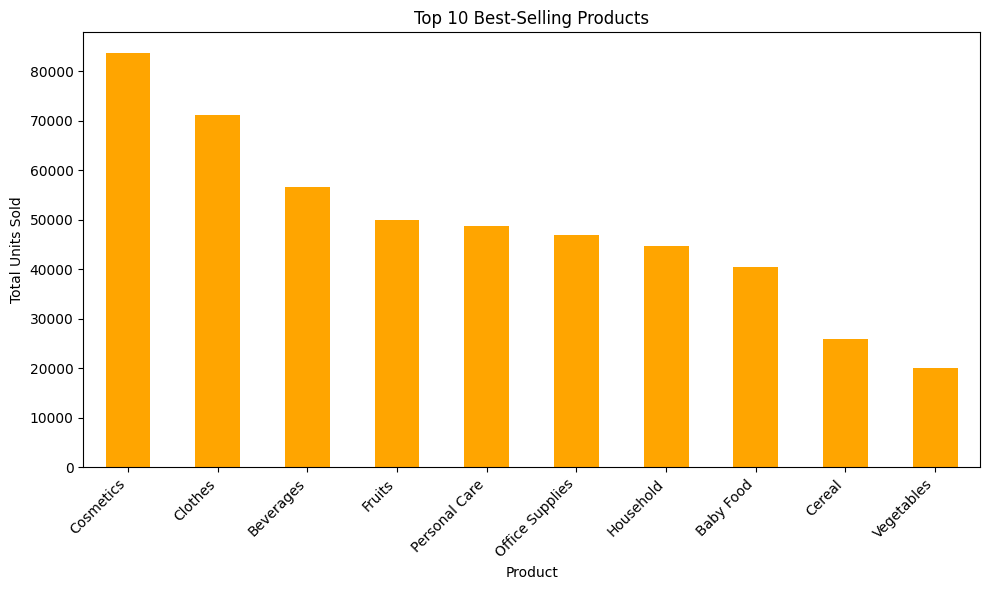

In [41]:
#Which products are the best-sellers?
best_selling_products = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).head(10)

# Plotting the bar chart for best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar', color='Orange')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

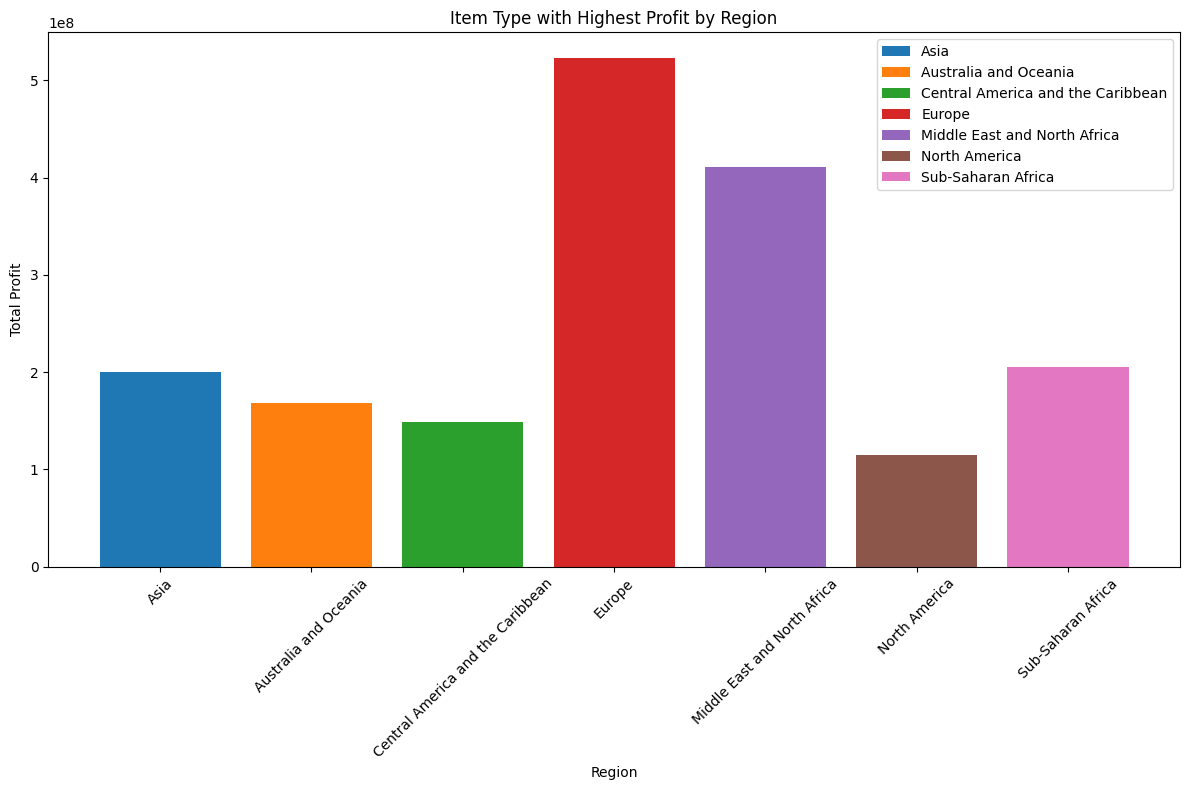

In [43]:
#Highest profit by region nd item type
# Calculate total profit by region and item type
profit_by_region_item = df.groupby(['Region', 'Item Type'])['Total Profit'].sum().reset_index()

# Find the item type with the highest profit in each region
highest_profit_by_region = profit_by_region_item.loc[profit_by_region_item.groupby('Region')['Total Profit'].idxmax()]

# Plotting
plt.figure(figsize=(12, 8))
for region in highest_profit_by_region['Region'].unique():
    region_data = highest_profit_by_region[highest_profit_by_region['Region'] == region]
    plt.bar(region_data['Region'], region_data['Total Profit'], label=region)

plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Item Type with Highest Profit by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.400000  190.390000   1.373487e+06   
std    2.606153e+08  2794.484562  235.670417  188.220046   1.460029e+06   
min    1.146066e+08   124.000000    9.000000    6.000000   4.870000e+03   
25%    3.389225e+08  2836.250000   81.000000   35.000000   2.687208e+05   
50%    5.577086e+08  5382.500000  179.500000  107.000000   7.523140e+05   
75%    7.907551e+08  7369.000000  437.000000  263.000000   2.212044e+06   
max    9.940222e+08  9925.000000  668.000000  524.000000   5.997054e+06   

         Total Cost  Total Profit  
count  1.000000e+02  1.000000e+02  
mean   9.318052e+05  4.416820e+07  
std    1.083938e+06  4.385379e+07  
min    3.612000e+03  1.258020e+05  
25%    1.688678e+05  1.214436e+07  
50%    3.635660e+05  2.907680e+07  
75%    1.613869e+06  6.358288e+07  
max    4.509793e+06  1.719922e+08  


<ipython-input-47-d9f7b2269668>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


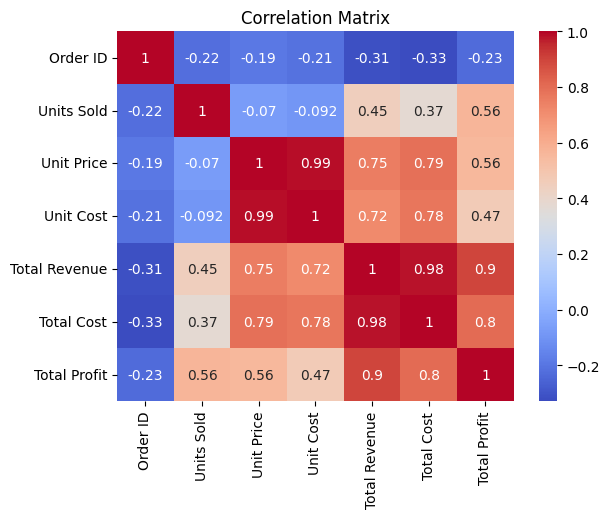

In [47]:
# Summary statistics
print(df.describe())

# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()







In conclusion, the EDA conducted on the dataset has provided valuable insights into sales trends, customer behavior,Correlation analysis and profitability metrics. By leveraging these insights, businesses can make informed decisions to optimize operations, improve performance, and drive growth. insights gained from each visualization:

